<h1>PS-4</h1>
<h3>Name : B. Nithin Kumar</h3>
<h3>Roll No : COE19B023</h3>

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from apyori import apriori 

<h2 style="color : green;">Question 1</h2>

{Average Price, Total Volume, 4046, 4225, 4770}  -> set will be the subset of relevant attributes.

<h2 style="color : green;">Question 2</h2>

In [110]:
df = pd.read_csv("Trail.csv")

#used to remove dulpicate rows
print("Dimensions of the orginal data ",df.shape)
print("Table after removing duplicate rows")
df=df.drop_duplicates()
df


Dimensions of the orginal data  (202, 13)
Table after removing duplicate rows


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,NaN,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
5,13-12-2015,1.21,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,organic,2015,xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,NaN,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,NaN,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,NaN,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,NaN,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston


In [111]:
print("Dimensions of the updated data ",df.shape)
print("Table after replacing missing values with 1.25")
df['AveragePrice'] = df['AveragePrice'].fillna((1.25))
df['AveragePrice'] = df['AveragePrice'].replace('NAN', 1.25)
df


Dimensions of the updated data  (195, 13)
Table after replacing missing values with 1.25


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,1.25,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
5,13-12-2015,1.21,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,organic,2015,xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20-09-2015,1.25,498640.23,4376.74,398673.48,418.46,95171.55,91612.66,3558.89,0.0,conventional,2015,Boston
198,13-09-2015,1.25,655682.95,5422.29,560792.23,353.77,89114.66,84843.55,4271.11,0.0,conventional,2015,Boston
199,06-09-2015,1.25,577774.74,4237.44,477867.83,496.62,95172.85,94558.41,614.44,0.0,conventional,2015,Boston
200,30-08-2015,1.25,526664.87,4177.03,438502.90,554.04,83430.90,83242.01,188.89,0.0,conventional,2015,Boston


<h2 style="color : green;">Question 3</h2>

In [112]:
df =pd.read_csv("Avocado Dataset.csv")
new_df1 = df.copy()
print("Thresold for year attribute set for above 2016 as 1 and other as 0")
new_df1['year'] = (new_df1['year'] > 2016).astype(int)
new_df1


Thresold for year attribute set for above 2016 as 1 and other as 0


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,1,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,1,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,1,WestTexNewMexico


<h2 style="color : green;">Question 4</h2>

In [113]:
df_new = df.copy()
print("Categorical Attributes are : \nType\nRegion\n")
gle = LabelEncoder()
region_labels = gle.fit_transform(df_new['region'])
region_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

gle = LabelEncoder()
type_labels = gle.fit_transform(df_new['type'])
type_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

print("Region Attribute are mapped as follows: \n\n",region_mappings)
print("\n\nType Attribute is mapped as follows: \n\n",type_mappings)
df_new['region'] = region_labels
df_new['type'] = type_labels
(df_new)

Categorical Attributes are : 
Type
Region

Region Attribute are mapped as follows: 

 {0: 'Albany', 1: 'Atlanta', 2: 'BaltimoreWashington', 3: 'Boise', 4: 'Boston', 5: 'BuffaloRochester', 6: 'California', 7: 'Charlotte', 8: 'Chicago', 9: 'CincinnatiDayton', 10: 'Columbus', 11: 'DallasFtWorth', 12: 'Denver', 13: 'Detroit', 14: 'GrandRapids', 15: 'GreatLakes', 16: 'HarrisburgScranton', 17: 'HartfordSpringfield', 18: 'Houston', 19: 'Indianapolis', 20: 'Jacksonville', 21: 'LasVegas', 22: 'LosAngeles', 23: 'Louisville', 24: 'MiamiFtLauderdale', 25: 'Midsouth', 26: 'Nashville', 27: 'NewOrleansMobile', 28: 'NewYork', 29: 'Northeast', 30: 'NorthernNewEngland', 31: 'Orlando', 32: 'Philadelphia', 33: 'PhoenixTucson', 34: 'Pittsburgh', 35: 'Plains', 36: 'Portland', 37: 'RaleighGreensboro', 38: 'RichmondNorfolk', 39: 'Roanoke', 40: 'Sacramento', 41: 'SanDiego', 42: 'SanFrancisco', 43: 'Seattle', 44: 'SouthCarolina', 45: 'SouthCentral', 46: 'Southeast', 47: 'Spokane', 48: 'StLouis', 49: 'Syracuse',

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


<h2 style="color : green;">Question 5</h2>

In [114]:
print("One hot Encoding (Region Attribute)")
df_new = pd.get_dummies(df, columns=["region"])
df_new

One hot Encoding (Region Attribute)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,...,0,0,0,0,0,0,0,0,0,1


<h2 style="color : green;">Question 6</h2>

Average Price is the only attribute showing missing values (Used Heat Map)


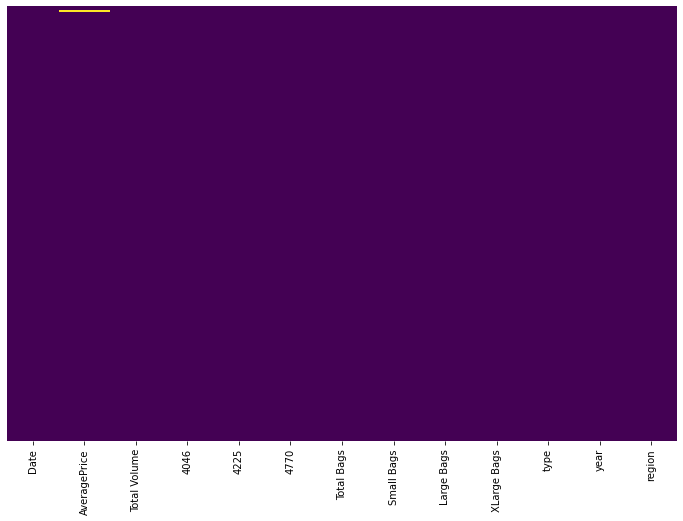

In [115]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Average Price is the only attribute showing missing values (Used Heat Map)")

In [116]:
#converting all num to float and str fields values will be set to NaN
df['AveragePrice'] = pd.to_numeric(df['AveragePrice'],errors="coerce")
df = df.dropna()
print('All missing value tuples are removed from the table')
df.head(20)

All missing value tuples are removed from the table


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
12,04-10-2015,1.31,61007.10,2268.32,49880.67,101.36,8756.75,8379.98,376.77,0.00,conventional,2015,Albany
13,27-09-2015,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.00,conventional,2015,Albany
14,20-09-2015,1.33,69759.01,1028.03,59313.12,150.50,9267.36,8489.10,778.26,0.00,conventional,2015,Albany
15,13-09-2015,1.28,76111.27,985.73,65696.86,142.00,9286.68,8665.19,621.49,0.00,conventional,2015,Albany
16,06-09-2015,1.11,99172.96,879.45,90062.62,240.79,7990.10,7762.87,227.23,0.00,conventional,2015,Albany


<h2 style="color : green;">Question 7</h2>

As from the heatmap generated in the previous question, the attribute Average Price has highest nullity with comparsion to other columns.

In [117]:
print('Average Price column dropped from the dataset')
df.drop(columns=['AveragePrice'])

Average Price column dropped from the dataset


,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


<h2 style="color : green;">Question 8</h2>

In [118]:
print("Dimensions of dataset ",df.shape)
print("\n\n")
print("Data types\n\n",df.dtypes,"\n")
df.describe()

Dimensions of dataset  (18202, 13)



Data types

 Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object 



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18202.000000,1.820200e+04,1.820200e+04,1.820200e+04,1.820200e+04,1.820200e+04,1.820200e+04,1.820200e+04,18202.000000,18202.000000
mean,1.406545,8.519824e+05,2.937307e+05,2.952842e+05,2.287744e+04,2.400880e+05,1.825002e+05,5.447332e+04,3114.446564,2016.151027
std,0.402956,3.457871e+06,1.266541e+06,1.205619e+06,1.075965e+05,9.874718e+05,7.471127e+05,2.442662e+05,17715.018969,0.939398
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.080600e+04,8.514675e+02,2.992905e+03,0.000000e+00,5.050988e+03,2.823327e+03,1.275800e+02,0.000000,2015.000000
50%,1.370000,1.073302e+05,8.723230e+03,2.884985e+04,1.843200e+02,3.972776e+04,2.631574e+04,2.657060e+03,0.000000,2016.000000
75%,1.660000,4.325411e+05,1.116655e+05,1.491672e+05,6.244020e+03,1.110049e+05,8.327759e+04,2.215315e+04,134.662500,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [119]:
li=[]
for i in df.columns:
    li.append(df[i].value_counts().idxmax())
new_df = pd.DataFrame([li],index=["Mode"],columns=df.columns)
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Mode,18-03-2018,1.15,569349.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,organic,2017,NewOrleansMobile


In [120]:
print("Correlation matrix")
df.corr()

Correlation matrix


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.193046,-0.208762,-0.172999,-0.179743,-0.177437,-0.175048,-0.173352,-0.117914,0.091771
Total Volume,-0.193046,1.000000,0.977875,0.974208,0.872213,0.963047,0.967237,0.880641,0.747147,0.016709
4046,-0.208762,0.977875,1.000000,0.926185,0.833408,0.920054,0.925282,0.838625,0.699349,0.002621
4225,-0.172999,0.974208,0.926185,1.000000,0.887899,0.905829,0.916065,0.810074,0.688849,-0.009752
4770,-0.179743,0.872213,0.833408,0.887899,1.000000,0.792317,0.802734,0.698476,0.679866,-0.037068
Total Bags,-0.177437,0.963047,0.920054,0.905829,0.792317,1.000000,0.994335,0.943008,0.804220,0.071092
Small Bags,-0.175048,0.967237,0.925282,0.916065,0.802734,0.994335,1.000000,0.902588,0.806836,0.063495
Large Bags,-0.173352,0.880641,0.838625,0.810074,0.698476,0.943008,0.902588,1.000000,0.710832,0.087343
XLarge Bags,-0.117914,0.747147,0.699349,0.688849,0.679866,0.804220,0.806836,0.710832,1.000000,0.080602
year,0.091771,0.016709,0.002621,-0.009752,-0.037068,0.071092,0.063495,0.087343,0.080602,1.000000


In [121]:
print('Skewness of float type attributes:\n')
df.skew(axis = 0, skipna = True,numeric_only=True)

Skewness of float type attributes:



AveragePrice     0.577354
Total Volume     8.995953
4046             8.637038
4225             8.931849
4770            10.147034
Total Bags       9.743434
Small Bags       9.528252
Large Bags       9.783947
XLarge Bags     13.123044
year             0.211508
dtype: float64

In [122]:
print(collections.Counter(df['type'].to_list()))

Counter({'organic': 9124, 'conventional': 9078})


As we can see, both the classes have appoximately same number of observations. So, Class distribution of dataset is not imbalanced

<h2 style='color:green;'>Question 9</h2>

<h3>Example 1</h3>

In [123]:
lst = ['apple']*3 + ['orange']*2 + ['banana']*2
data = pd.Series(lst)
data

0     apple
1     apple
2     apple
3    orange
4    orange
5    banana
6    banana
dtype: object

In [124]:
probability = data.value_counts(normalize=True)
probability

apple     0.428571
orange    0.285714
banana    0.285714
dtype: float64

In [125]:
print("Gini index :",(1-(np.sum(np.square(probability)))))
entropy = (-1*np.sum(np.log2(probability)*probability))
print("Entropy : ",entropy)
print("Info gain : ",(1-entropy))

Gini index : 0.653061224489796
Entropy :  1.5566567074628228
Info gain :  -0.5566567074628228


Lower Entropy => Less impure =>more Informatoin Gain
Higher Entropy => High impure => less Information Gain

<h3>Example 2</h3>

In [126]:
lst2 = ['apple', 'orange', 'banana', 'mango', 'blueberry', 'watermelon', 'pear']
data = pd.Series(lst2)
data

0         apple
1        orange
2        banana
3         mango
4     blueberry
5    watermelon
6          pear
dtype: object

In [127]:
probability = data.value_counts(normalize=True)
probability

apple         0.142857
orange        0.142857
banana        0.142857
mango         0.142857
blueberry     0.142857
watermelon    0.142857
pear          0.142857
dtype: float64

In [128]:
print("Gini index :",(1-(np.sum(np.square(probability)))))
entropy = (-1*np.sum(np.log2(probability)*probability))
print("Entropy : ",entropy)
print("Info gain : ",(1-entropy))

Gini index : 0.8571428571428572
Entropy :  2.807354922057604
Info gain :  -1.8073549220576042


We can observe that high entropy => high impure datset

<h2 style="color : green;">Question 11</h2>

Used mushroom dataset 
Link : http://fimi.uantwerpen.be/data/mushroom.dat

In [129]:

with open('mushroom.txt') as f:
    lines = f.readlines()
records=[]
for i in lines:
    temp = i.split(" ")
    temp.pop()
    records.append(temp)

print('First 20 records : ')
print(records[0:20])


First 20 records : 
[['1', '3', '9', '13', '23', '25', '34', '36', '38', '40', '52', '54', '59', '63', '67', '76', '85', '86', '90', '93', '98', '107', '113'], ['2', '3', '9', '14', '23', '26', '34', '36', '39', '40', '52', '55', '59', '63', '67', '76', '85', '86', '90', '93', '99', '108', '114'], ['2', '4', '9', '15', '23', '27', '34', '36', '39', '41', '52', '55', '59', '63', '67', '76', '85', '86', '90', '93', '99', '108', '115'], ['1', '3', '10', '15', '23', '25', '34', '36', '38', '41', '52', '54', '59', '63', '67', '76', '85', '86', '90', '93', '98', '107', '113'], ['2', '3', '9', '16', '24', '28', '34', '37', '39', '40', '53', '54', '59', '63', '67', '76', '85', '86', '90', '94', '99', '109', '114'], ['2', '3', '10', '14', '23', '26', '34', '36', '39', '41', '52', '55', '59', '63', '67', '76', '85', '86', '90', '93', '98', '108', '114'], ['2', '4', '9', '15', '23', '26', '34', '36', '39', '42', '52', '55', '59', '63', '67', '76', '85', '86', '90', '93', '98', '108', '115'], ['2'

In [130]:
association_rules = apriori(records,min_support = 0.05, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)
association_results = list(association_rules)

def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs,support, confidence, lift))

output_DataFrame = pd.DataFrame(inspect(association_results), columns = ['Base Item', 'Appended Item','Support', 'Confidence', 'Lift'])
output_DataFrame

,Base Item,Appended Item,Support,Confidence,Lift
0,101,14,0.079764,0.397059,3.009054
1,101,29,0.194978,0.970588,3.650490
2,101,45,0.066470,0.330882,3.672252
3,101,70,0.053176,0.264706,4.800158
4,101,71,0.053176,0.264706,4.977941
5,101,79,0.053176,0.264706,4.977941
6,101,80,0.053176,0.264706,4.200138
7,101,95,0.159527,0.794118,4.977941
8,102,31,0.070901,0.241206,3.402010
9,102,32,0.070901,0.241206,3.402010
